# Coursera Certificate 

https://www.coursera.org/account/accomplishments/certificate/T779NM6Q6CD3

## Task 1: Introduction

We will take a look at two types of regularization techniques
- Weight Regularization
- Dropout Regularization.



## Task 2: Importing the Data

In [14]:
from tensorflow.python.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape) 

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


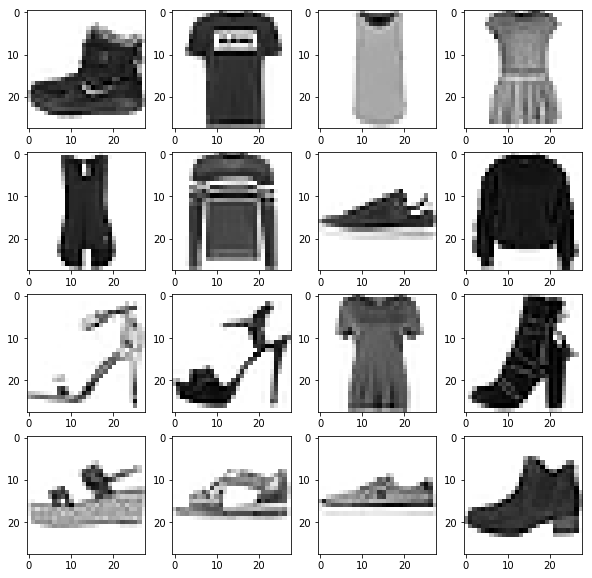

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))
for i in range (16): # first 16 images
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i], cmap = 'binary')
plt.show()

## Task 3: Processing the Data
___
___
Original Label: \[5\] is converted to -> One Hot Encoded Label: \[0, 0, 0, 0, 0, 1, 0, 0, 0, 0\]

In [17]:
# from tensorflow.python.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

# return encoded representation
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [18]:
# Each label is 10 dimensional vector.
# Now we need to reshape examples --from 28 x 28 rows and columns to unroll them into 784 dimensional vector
# this unrolling is done to make it easy to feed the examoles to neural network

import numpy as np
# we have 60,000 training examples 
x_train = np.reshape(x_train, (60000, 28*28))
x_test = np.reshape(x_test, (10000, 28*28))

# Now, we need to normalize the pixel values.
# Right now the values are from 0-255

x_train = x_train/255.
x_test = x_test /255.

## Task 4: Regularization and Dropout


![Neural Network](images/neural_network.png)

#### Dropouts:

![Dropouts](images/dropouts.png)


## Task 5: Creating the Experiment Part 1
___

In [1]:
# How do we know certain values for our parameters gives us a best fit.
#-- We can determine the performance by using training metrics like loss and accuracy.
#-- In fact, the optimization algorithm learns values for weights and biases by trying to reduce the overall the loss value for the model.
#--  this loss value is simply a way to measure differnece between the prediction our model is giving on the training examples
#-- vs the actuall labels that represents in our data set.

# We will add L2 normalization on weights

from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.python.keras.regularizers import l2

nodes = 64
#weight regularizers
def create_model(weight_reg = False, dropout_reg = False):
    model = Sequential()
    if weight_reg:
        model.add(Dense(nodes,activation = 'relu',
                 input_shape = (784,), kernel_regularizer = l2(0.001)
                ))
        
        model.add(Dense(nodes, activation = 'relu', kernel_regularizer = l2(0.001)
                       ))
    else: 
            model.add(Dense(nodes, activation = 'relu', input_shape = (784,)
                           ))
            model.add(Dense(nodes, activation = 'relu'))
            
    if dropout_reg:
        
        BatchNormalization(
                    axis=-1,
                    momentum=0.99,
                    epsilon=0.001,
                    beta_initializer="zeros",
                    gamma_initializer="ones",
                    moving_mean_initializer="zeros",
                    moving_variance_initializer="ones",
                    renorm_momentum=0.99)
        
        model.add(Dropout(0.2)) # 20% of nodes will be deactivated for each example
        
    model.add(Dense(10, activation = 'softmax'))
    model.compile( 
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    model.summary()
    return model
        


## Task 6: Creating the Experiment Part 2
___

In [36]:
def show_acc(h, E):
    # history objects and number of epochs
    plt.plot(range(E), h.history['accuracy'], label = 'Training')
    plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
    plt.ylim([0.7, 1.0])
    plt.legend()
    plt.show()
    return

In [37]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(e, end = '.')
)

def run_experiment(E = 20, weight_reg = False, dropout_reg = False):
    m = create_model(weight_reg, dropout_reg)
    h = m.fit(
        x_train, y_train,
        epochs = E,
        verbose = False,
        validation_data = (x_test, y_test),
        callbacks = [simple_log]
    )
    show_acc(h, E)
    return

## Task 7: Results
___

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

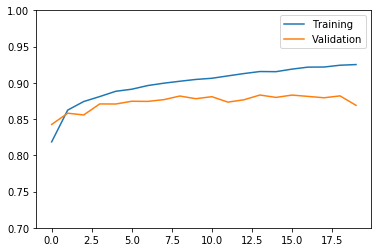

In [38]:
run_experiment()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

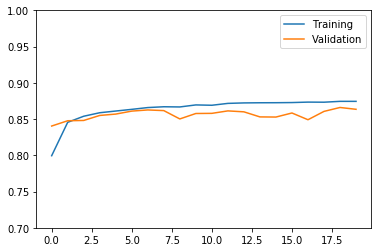

In [41]:
run_experiment(weight_reg = True, dropout_reg = True)